In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/juani/OneDrive/Documentos/Python/Data Science Udemy Course/07_Data Capstone Project/Files/911.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/juani/OneDrive/Documentos/Python/Data Science Udemy Course/07_Data Capstone Project/Files/911.csv'

In [ ]:
#Check Head

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
#Checking info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
# What are the 5 zipcodes for 911 calls?

df["zip"].value_counts().head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [ ]:
#What are the top 5 townships for 911?

df["twp"].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [ ]:
#Take at the "title" column, how many unique title codes are there?"

df["title"].nunique()

110

In [ ]:
#Creating few Features

df["reason"] = df["title"].apply(lambda x: x.split(":")[0])


In [ ]:
#What are the most common reason for a 911 call based off this nee column

df["reason"].value_counts()

reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

C:\Users\juani\AppData\Local\Temp\ipykernel_5272\3341243210.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x="reason", palette="magma")


<Axes: xlabel='reason', ylabel='count'>

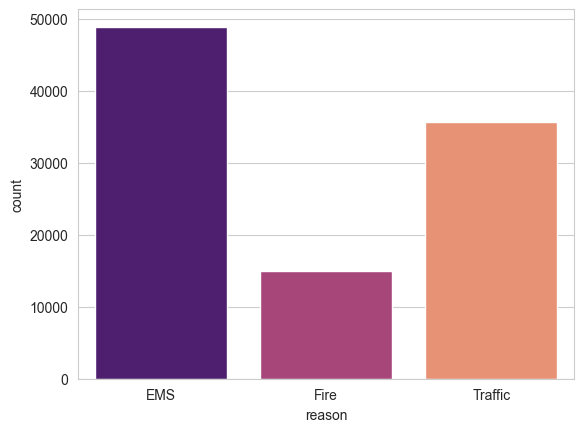

In [ ]:
#Use Sea born to create a countplot of 911 calls by reason

sns.countplot(df, x="reason", palette="magma")

In [ ]:
#What is the data types of the objects in the timeStamp Column? Convert it to time
df.dtypes
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [ ]:
#Creating 3 new columns
df["hour"] = df["timeStamp"].dt.hour
df["month"] = df["timeStamp"].dt.month
df["day of week"] = df["timeStamp"].dt.day_of_week

In [ ]:
#Droping some extra
df.drop(columns=["day","week"], inplace=True)

KeyError: "['day', 'week'] not found in axis"

In [ ]:
#Mapping number of days with their current value
df["day of week"] = df["day of week"].map({
    0:"Mon",
    1:"Tue",
    2:"Wed",
    3:"Thu",
    4:"Fri",
    5:"Sat",
    6:"Sun"
})

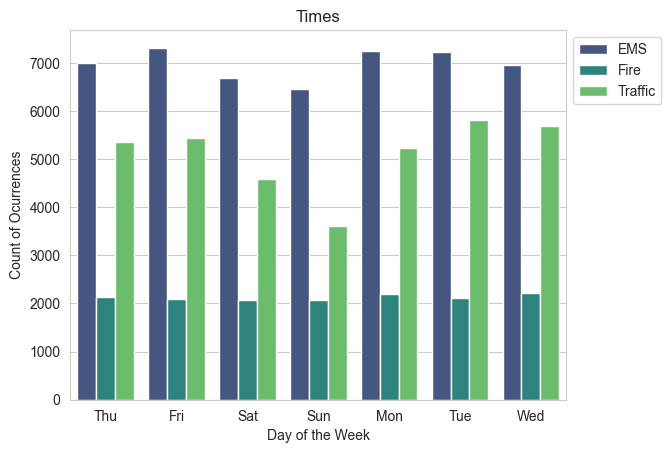

In [ ]:
#Plotting count plot pf the day of the week column with the hue base off the reason column
ax = sns.countplot(df, x="day of week", hue="reason", palette="viridis")
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Count of Ocurrences")
ax.set_title("Times")
ax.legend(bbox_to_anchor=(1,1),loc=2)

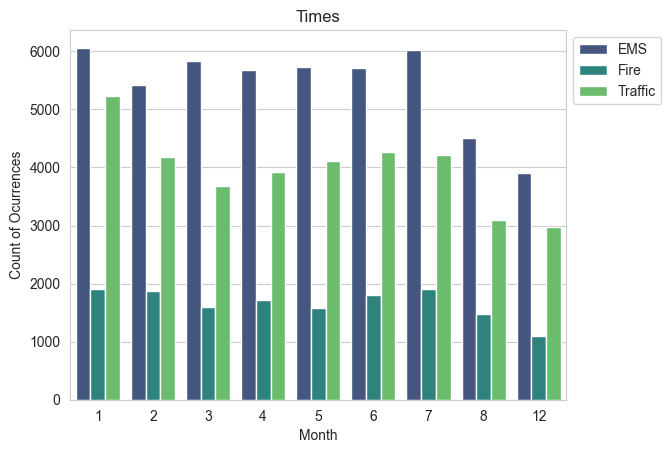

In [ ]:
#Plotting count plot pf the month column with the hue base off the reason column
ax = sns.countplot(df, x="month", hue="reason", palette="viridis")
ax.set_xlabel("Month")
ax.set_ylabel("Count of Ocurrences")
ax.set_title("Times")
ax.legend(bbox_to_anchor=(1,1),loc=2)

<Axes: xlabel='month'>

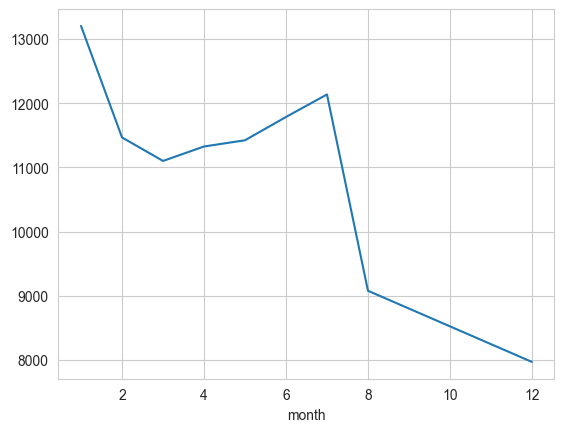

In [ ]:
#Plotting line plot
sns.set_style("whitegrid")
by_month = df.groupby(by="month").count()
by_month["lat"].plot()

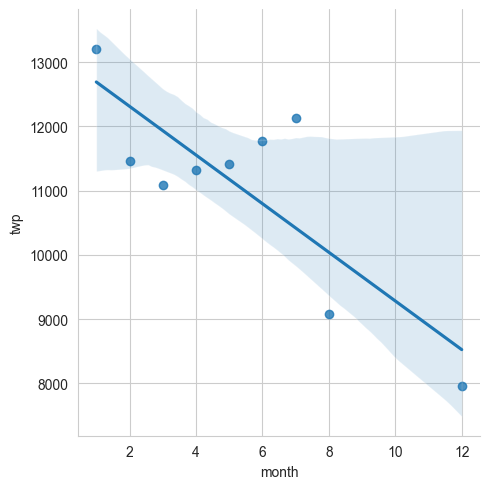

In [ ]:
sns.lmplot(data=by_month.reset_index(),x="month",y="twp")

In [ ]:
#Creating new columns 

df["date"] = df["timeStamp"].dt.date

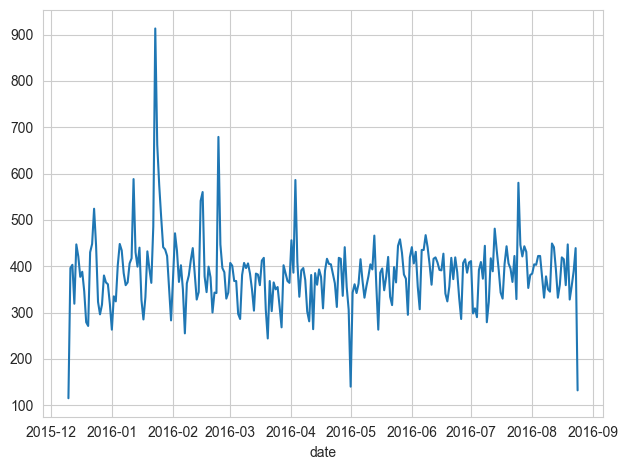

In [ ]:
df.groupby("date").count()["lat"].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

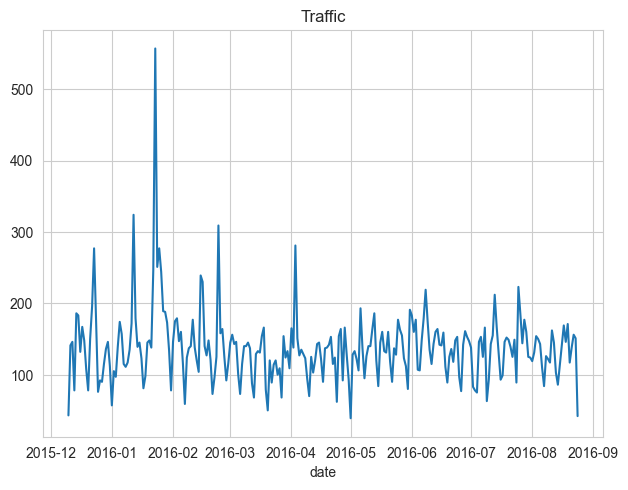

In [ ]:
df[df["reason"] == "Traffic"].groupby("date")["lat"].count().plot()
plt.tight_layout()
plt.title("Traffic")

Text(0.5, 1.0, 'Fire')

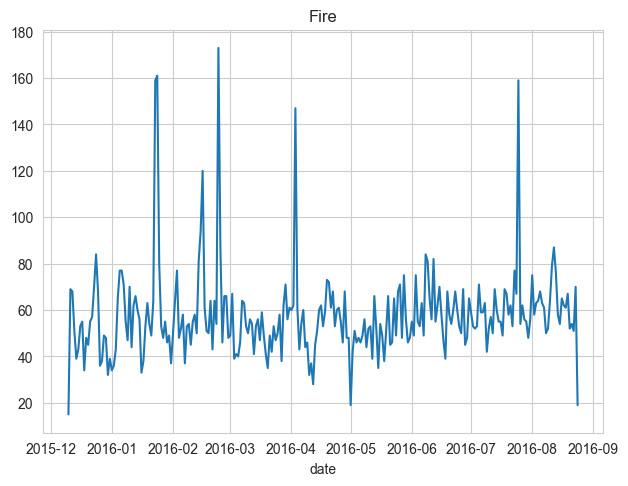

In [ ]:
df[df["reason"] == "Fire"].groupby("date")["lat"].count().plot()
plt.tight_layout()
plt.title("Fire")

Text(0.5, 1.0, 'EMS')

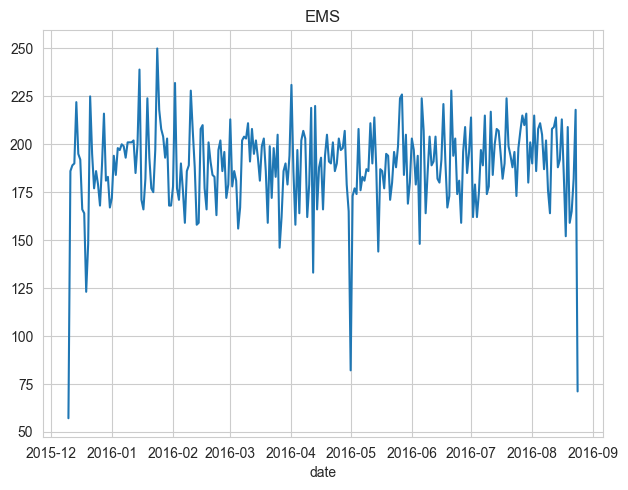

In [ ]:
df[df["reason"] == "EMS"].groupby("date")["lat"].count().plot()
plt.tight_layout()
plt.title("EMS")

In [ ]:
df.drop(columns="e", inplace=True)

In [ ]:
matrix = df.groupby(by=["day of week","hour"]).count()["reason"].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(matrix, cmap="magma", linewidths=1, linecolor="white", annot=True)
plt.xlabel("Hour")
plt.title("Heatmap")
plt.ylabel("day of the Week")

NameError: name 'df' is not defined

Text(312.18686868686865, 0.5, 'Month')

<Figure size 1200x600 with 0 Axes>

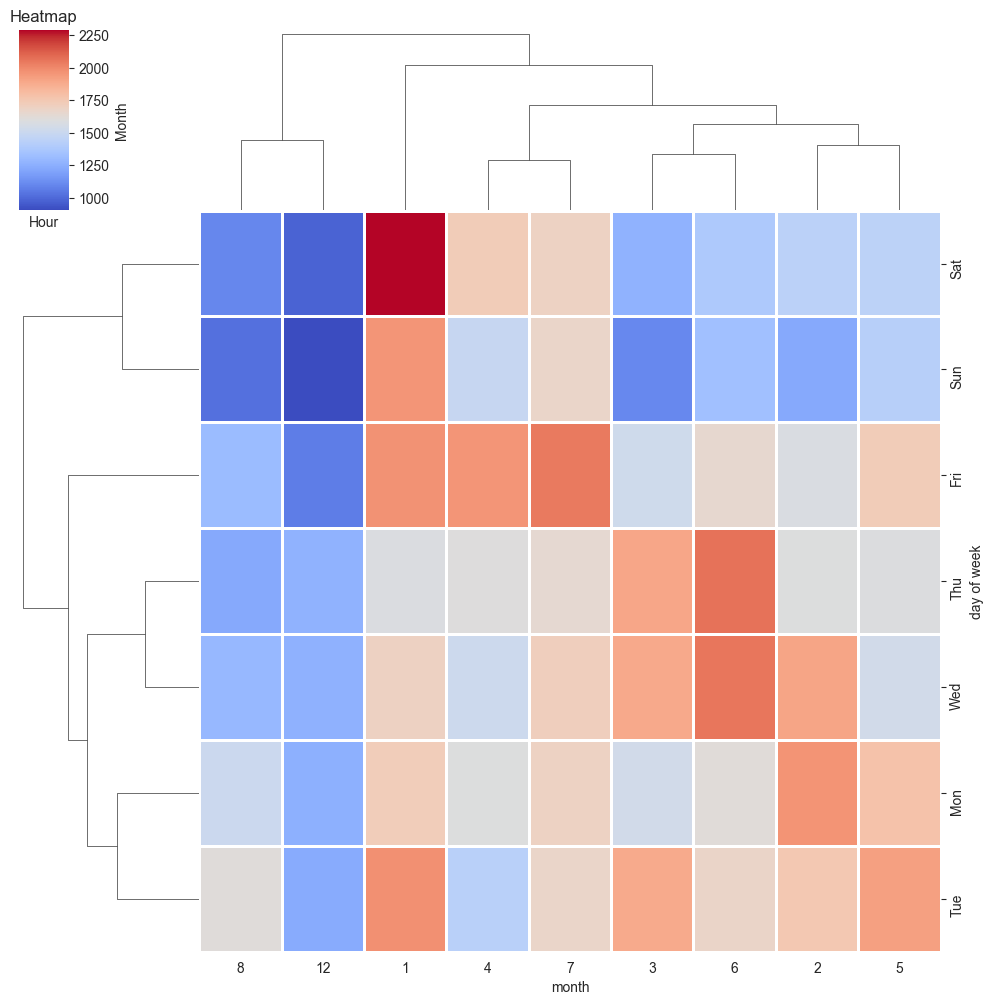

In [ ]:
matrix = df.groupby(by=["day of week","month"]).count()["reason"].unstack()
plt.figure(figsize=(12,6))
sns.clustermap(matrix, cmap="coolwarm", linewidths=1, linecolor="white")
plt.xlabel("Hour")
plt.title("Heatmap")
plt.ylabel("Month")